### Assessed Task #2

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

#from collections import Counter

import warnings
warnings.filterwarnings('ignore')

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = 'TsBOnrwydStaWmvUeShzJ90iS'
consumer_key_secret = 'FkkmXlmwTSjaf8pds7rz3tvOpehRVPpB8lKlWBQzBp4fsDbKY1'
access_token = '2576751307-N7lUuCWkpY7ZcNDJZlRzDB6QAnfEjN9tgWhhA9B'
access_token_secret = 'L6nOSOKuJ2GbSDj8nTfGb5yCQVxGKlZrIFzzdtyacwfkV'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**Task 1**
Collect 400 tweets from two different Twitter users (Australian politicians), 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.


#### Julian Hill MP (@JulianHillMP) 


In [3]:
max_tweets = 200
screen_name = '@JulianHillMP'

tweets_JH = api.user_timeline(screen_name = screen_name,
                             tweet_mode = 'extended',
                             count = max_tweets)

Writing all the tweets for Julian Hill MP .json file

In [4]:
list_of_dicts_JH = []
for tweet in tweets_JH:
    list_of_dicts_JH.append(tweet._json)
#print(list_of_dicts_JH)

with open('Files/JulianHillMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_JH , indent = 4))

#### Scott Morrison (@ScottMorrisonMP) 

In [5]:
max_tweets = 200
screen_name = '@ScottMorrisonMP'

tweets_SM = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

Writing all the tweets for Scott Morrison  .json file

In [6]:
list_of_dicts_SM = []
for tweet in tweets_SM:
    list_of_dicts_SM.append(tweet._json)
#print(list_of_dicts_SM)

with open('Files/ScottMorrisonMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_SM , indent = 4))

In [7]:
#JulianHillMP
list1 = []
with open('Files/JulianHillMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_JH = json.load(file)
        for dict in list_of_dicts_JH:
             list1.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })
print(list1[0])

{'user': 'Julian Hill MP', 'full_text': '@DougCameron51 @JoshFrydenberg Same level of courage as Peter Costello. But a far far worse Treasurer - record debt, still in deficit and a weak economy - and that was before COVID!', 'posting_time': 'Sat Oct 16 02:43:22 +0000 2021'}


In [8]:
#JulianHillMP
df_JH = pd.DataFrame(list1 , columns = ['user','full_text', 'posting_time'])
#df_JH

__ScottMorrisonMP__

In [9]:
#ScottMorrisonMP
list2 = []
with open('Files/ScottMorrisonMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_SM = json.load(file)
        for dict in list_of_dicts_SM:
            list2.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })

In [10]:
#ScottMorrisonMP
df_SM = pd.DataFrame(list2 , columns = ['user','full_text', 'posting_time'])
#df_SM

Merging df_JH and df_SM tables into one df

In [11]:
df = pd.concat([df_JH,df_SM], axis=0)
df = df.reset_index(drop=True)
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
1,Julian Hill MP,"RT @DougCameron51: What a boring, pathetic pis...",Sat Oct 16 02:42:33 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
3,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,Fri Oct 15 06:19:32 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021


Writng all the tweets for each of the two users, as a single .csv file. 

In [12]:
import csv

#csv path
FILE_PATH = "C:/Users/piyak/Github/my-project/Twitter_Analysis/Files/tweets.csv"

#Save dataframe to csv
df.to_csv(FILE_PATH)

**Task 2** Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

In [13]:
#Extract posting hour from posting_time
df_JH['posting_time'] = pd.to_datetime(df_JH['posting_time'])
df_JH['hour'] = df_JH['posting_time'].dt.hour
df_SM['posting_time'] = pd.to_datetime(df_SM['posting_time'])
df_SM['hour'] = df_SM['posting_time'].dt.hour

In [14]:
JH= df_JH['hour'].value_counts().sort_index().to_frame('JH')
JH['hour'] = JH.index
JH.reset_index(drop=True, inplace=True)
JH = JH[['hour', 'JH']]
#JH

In [15]:
SM= df_SM['hour'].value_counts().sort_index().to_frame('SM')
SM['hour'] = SM.index
SM.reset_index(drop=True, inplace=True)
SM = SM[['hour', 'SM']]
#SM

In [16]:
all_hour = pd.merge(JH, SM,on = ['hour'], how = 'outer')
all_hour.fillna(0, inplace=True)
all_hour['JH'] = all_hour['JH']. astype(int)
all_hour['SM'] = all_hour['SM']. astype(int)
all_hour.set_index('hour', inplace=True)
all_hour = all_hour.sort_index()
all_hour

,JH,SM
hour,,
0,4,9
1,5,10
2,10,15
3,10,12
4,16,13
5,12,20
6,11,12
7,13,15
8,22,7


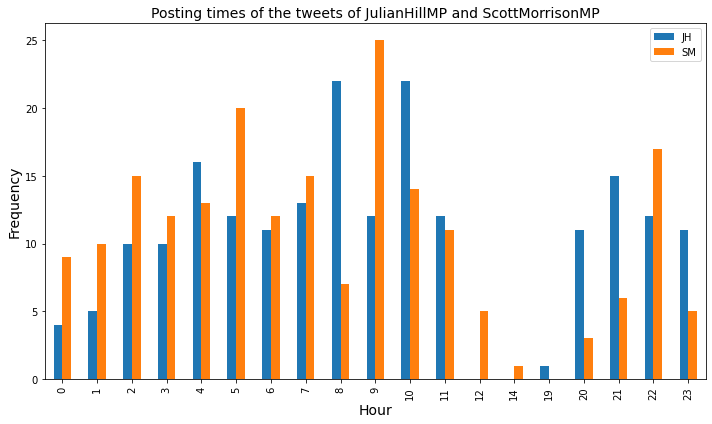

In [17]:
all_hour.plot(kind='bar', figsize=(10,6))
plt.title('Posting times of the tweets of JulianHillMP and ScottMorrisonMP', fontsize = 14)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.tight_layout()

**Task 3** Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [18]:
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
1,Julian Hill MP,"RT @DougCameron51: What a boring, pathetic pis...",Sat Oct 16 02:42:33 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
3,Julian Hill MP,RT @SenKatyG: The Morrison Government wants us...,Fri Oct 15 06:19:32 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021


Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [19]:
df = df[~df['full_text'].str.startswith('RT')]
df.head(5)

,user,full_text,posting_time
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021
2,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021
4,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021
5,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021
6,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021


Removing url links, extracting url links from the full text

In [20]:
df['text_without_links'] = df['full_text'].str.replace('http\S+|www.\S+', '', case = False)
df['tweet_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df['include_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df.reset_index(drop=True, inplace=True)
df.head(5)

,user,full_text,posting_time,text_without_links,tweet_links,include_links
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021,@DougCameron51 @JoshFrydenberg Same level of c...,[],False
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021,So 8 years of failure &amp; missed opportuniti...,[https://t.co/umIMNafcM2],True
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021,"@mattjcan Ummm, you do know how that story end...",[],False
4,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True


In [21]:
print(df['text_without_links'][0])
print('*******************************')
print(df['text_without_links'][1])

@DougCameron51 @JoshFrydenberg Same level of courage as Peter Costello. But a far far worse Treasurer - record debt, still in deficit and a weak economy - and that was before COVID!
*******************************
So 8 years of failure &amp; missed opportunities - 21 failed climate policies already - isn’t long enough?
#auspol 


Creating new df to calculate proportion of tweet including pictures or links

In [22]:
media_prob = df.groupby(['user','include_links']).size().reset_index(name ='count')
media_prob['total'] = media_prob.groupby(['user'])['count'].transform('sum')
media_prob = media_prob.sort_values(by=['total'], ascending=False)
media_prob

,user,include_links,count,total
2,Scott Morrison,False,58,166
3,Scott Morrison,True,108,166
0,Julian Hill MP,False,47,138
1,Julian Hill MP,True,91,138


In [23]:
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]
media_prob

,user,include_links,count,total,percentage
2,Scott Morrison,False,58,166,34.939759
3,Scott Morrison,True,108,166,65.060241
0,Julian Hill MP,False,47,138,34.057971
1,Julian Hill MP,True,91,138,65.942029


In [24]:
cols = ['user', 'percentage']
media_prob_true = media_prob[media_prob['include_links'] == True]
media_prob_true = media_prob_true[cols]
media_prob_true

,user,percentage
3,Scott Morrison,65.060241
1,Julian Hill MP,65.942029


Text(0.5, 0, 'User')

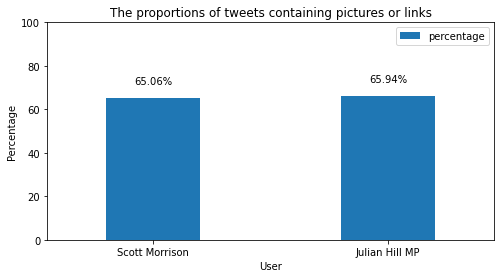

In [25]:
ax = media_prob_true.plot(kind='bar', x='user', y= 'percentage', figsize=(8,4), width=0.4, rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

**Task 4** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

Removing, extracting and counting hashtags of each tweet

In [26]:
hashtag = re.compile("#(\w+)")
df['text_without_hashtags'] = df['text_without_links'].apply(lambda x: hashtag.sub(r'', x))
df['hashtags'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_count'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df.head(5)

,user,full_text,posting_time,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,Julian Hill MP,@DougCameron51 @JoshFrydenberg Same level of c...,Sat Oct 16 02:43:22 +0000 2021,@DougCameron51 @JoshFrydenberg Same level of c...,[],False,@DougCameron51 @JoshFrydenberg Same level of c...,[],0
1,Julian Hill MP,So 8 years of failure &amp; missed opportuniti...,Fri Oct 15 20:31:24 +0000 2021,So 8 years of failure &amp; missed opportuniti...,[https://t.co/umIMNafcM2],True,So 8 years of failure &amp; missed opportuniti...,[auspol],1
2,Julian Hill MP,"Ummm, Matty, you do know how that story ends r...",Thu Oct 14 23:49:50 +0000 2021,"Ummm, Matty, you do know how that story ends r...",[https://t.co/WG6qxHRRhI],True,"Ummm, Matty, you do know how that story ends r...",[auspol],1
3,Julian Hill MP,"@mattjcan Ummm, you do know how that story end...",Thu Oct 14 23:44:18 +0000 2021,"@mattjcan Ummm, you do know how that story end...",[],False,"@mattjcan Ummm, you do know how that story end...",[auspol],1
4,Julian Hill MP,How many tools can you count in this photo? ht...,Thu Oct 14 21:54:55 +0000 2021,How many tools can you count in this photo?,[https://t.co/Bk7cMCoWsG],True,How many tools can you count in this photo?,[],0


Creating new df to calculate hashtags frequency of each users

In [27]:
hashtags_JH = df[df['user'] == 'Julian Hill MP']
hashtags_JH = hashtags_JH['hashtags_count'].value_counts().sort_index().to_frame('JulianHill')
hashtags_JH['hashtags_count'] = hashtags_JH.index
hashtags_JH = hashtags_JH[['hashtags_count', 'JulianHill']]
hashtags_JH.reset_index(drop=True, inplace=True)
hashtags_JH

,hashtags_count,JulianHill
0,0,49
1,1,38
2,2,26
3,3,10
4,4,12
5,5,2
6,6,1


In [28]:
hashtags_SM = df[df['user'] == 'Scott Morrison']
hashtags_SM = hashtags_SM['hashtags_count'].value_counts().sort_index().to_frame('ScottMorrison')
hashtags_SM['hashtags_count'] = hashtags_SM.index
hashtags_SM = hashtags_SM[['hashtags_count', 'ScottMorrison']]
hashtags_SM.reset_index(drop=True, inplace=True)
hashtags_SM

,hashtags_count,ScottMorrison
0,0,112
1,1,45
2,2,7
3,3,2


In [29]:
all_hashtags = pd.merge(hashtags_JH, hashtags_SM, on = ['hashtags_count'], how = 'outer')
all_hashtags.fillna(0, inplace=True)
all_hashtags['JulianHill'] = all_hashtags['JulianHill']. astype(int)
all_hashtags['ScottMorrison'] = all_hashtags['ScottMorrison']. astype(int)
all_hashtags.set_index('hashtags_count', inplace=True)
all_hashtags = all_hashtags.sort_index()
all_hashtags

,JulianHill,ScottMorrison
hashtags_count,,
0,49,112
1,38,45
2,26,7
3,10,2
4,12,0
5,2,0
6,1,0


Preparing dataframe for ploting a histogram of hashtags frequency of each users

In [30]:
hashtags_JH = df[df['user'] == 'Julian Hill MP']
hashtags_JH = hashtags_JH['hashtags_count']
#hashtags_JH
hashtags_SM = df[df['user'] == 'Scott Morrison']
hashtags_SM = hashtags_SM['hashtags_count']
#hashtags_SM

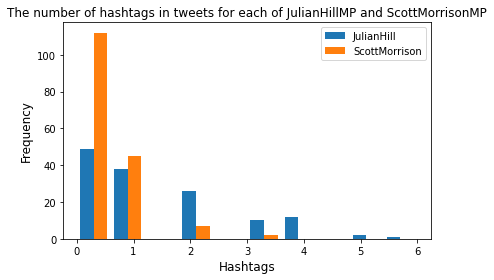

In [31]:
plt.hist([hashtags_JH, hashtags_SM], label=['JulianHill', 'ScottMorrison'], bins = 10)
plt.figsize=(8,6)
plt.title('The number of hashtags in tweets for each of JulianHillMP and ScottMorrisonMP', fontsize = 12)
plt.xlabel('Hashtags', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='upper right')
plt.tight_layout()

**Task 5** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [ ]:
df.head(5)

In [ ]:
print(df['full_text'][1])
print('*******************************************')
print(df['text_without_links'][1])
print('*******************************************')
print(df['text_without_hashtags'][1])

In [ ]:
cols = ['user', 'text_without_hashtags']
df2=df[cols]
df2

In [ ]:
mmomomo

__Cleaning tweets__

Remove emails and metions

In [ ]:
df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r'\S*@\S*\s?', x))
df2

In [ ]:
#df2['email'][7]

In [ ]:
#df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2

In [ ]:
df2['text_without_mentions'] = df2['text_without_hashtags'].apply(lambda x: re.sub('\S*@\S*\s?', '',x))
df2

In [ ]:
#df2['text_without_mentions'][6]

In [ ]:
#print(df['full_text'][6])
#print('*******************************************')
#print(df['text_without_links'][6])
#print('*******************************************')
#print(df['text_without_hashtags'][6])

In [ ]:
#df2['mentions-'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2['mentions_count'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x)).apply((lambda x: len(x)))
#df2

In [ ]:
#df2[df2['mentions_count'] > 1].head()

In [ ]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
df2['text_without_emoji'] = df2['text_without_mentions'].apply(lambda x: emoji_pattern.sub(r'', x))

In [ ]:
df2['text_without_emoji']

In [ ]:
#print(df['full_text'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_emoji'][16])

In [ ]:
df2['text_without_emoji'][5]

__Convert all words to lowercase__

In [ ]:
df2['cleaned_tweets'] = df2['text_without_emoji'].apply(lambda x: re.sub(r'\w', lambda m: m.group(0).lower(),x))
df2['cleaned_tweets']

In [ ]:
import string
word_list= df2['cleaned_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split(), x)
word_list

In [ ]:
user= df2['user']
user

In [ ]:
#Create df from lists
cols = ['User', 'Word_list']
data = list(zip(user, word_list))

tweets = pd.DataFrame(data, columns=cols)
tweets

In [ ]:
tweets_JH = tweets[tweets['User']=='Julian Hill MP']
tweets_JH = tweets_JH.reset_index(drop=True)

In [ ]:
JH_words=tweets_JH['Word_list']
JH_words

In [ ]:
tweets_SM = tweets[tweets['User']=='Scott Morrison']
tweets_SM = tweets_SM.reset_index(drop=True)

In [ ]:
SM_words=tweets_SM['Word_list']
SM_words

In [ ]:
#for word in word_list:
#    print(word)

In [ ]:
#word_list[4]

__Removing stop words with NLTK__

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

JH_wordlist = []
for tweet in JH_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            JH_wordlist.append(w)
JH_wordlist

In [ ]:
SM_wordlist = []
for tweet in SM_words:
    for w in tweet:
        if w not in stopwords.words("english"):
            SM_wordlist.append(w)
SM_wordlist

In [ ]:
from collections import Counter
counts_JH = Counter(JH_wordlist)
#print(counts_JH)
counts_JH1 = pd.DataFrame.from_dict(counts_JH, orient='index').reset_index()
counts_JH1 = counts_JH1.rename(columns={'index':'word', 0:'freq'})
counts_JH1['user'] = 'Julian Hill MP'
counts_JH1['SM_total'] = counts_JH1['freq'].sum()
print('Total JH words:',counts_JH1['freq'].sum())
sorted_JH = counts_JH1.sort_values(by=['freq'], ascending = [False])[:20]
sorted_JH

In [ ]:
counts_SM = Counter(SM_wordlist)
#print(counts_SM)
counts_SM1 = pd.DataFrame.from_dict(counts_SM, orient='index').reset_index()
counts_SM1 = counts_SM1.rename(columns={'index':'word', 0:'freq'})
counts_SM1['user'] = 'Scott Morrison'
counts_SM1['SM_total'] = counts_SM1['freq'].sum()
print('Total SM words:',counts_SM1['freq'].sum())
sorted_SM = counts_SM1.sort_values(by=['freq'], ascending = [False])[:20]
sorted_SM

In [ ]:
top20_outer = pd.merge(sorted_JH, sorted_SM, on='word', how='outer')
top20_outer

In [ ]:
momoomo

In [ ]:
#mona
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]

In [ ]:
top20_outer['freq_x'] = top20_outer['freq_x'].fillna(0)
top20_outer['freq_y'] = top20_outer['freq_y'].fillna(0)
top20_outer.fillna(method='ffill', inplace=True)
top20_outer

In [ ]:
top20_outer['ratio_JH'] = top20_outer['freq_x']+1/top20_outer['SM_total_x']+1
top20_outer['ratio_SM'] = top20_outer['freq_y']+1/top20_outer['SM_total_y']+1
top20_outer['odds_ratio'] = top20_outer['ratio_JH']/top20_outer['ratio_SM']
top20_outer['log'] = np.log2(top20_outer['odds_ratio'])

top20_outer

In [ ]:
cols = ['word', 'log']
results_df = top20_outer[cols]

new_index = results_df.log.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results.log) > 0]

plt.figure(figsize =(8,10))
plt.barh(filtered_results.word, filtered_results.log)
plt.xlabel('Julian Hill MP/Scott Morrison log ratio', fontsize = 14)
plt.ylabel('Word', fontsize = 14)
plt.show()

In [ ]:
#top20 = pd.concat([sorted_JH, sorted_SM], axis=0, ignore_index=True)
#top20

In [ ]:
#top20['word'].value_counts()
top20.groupby('word')['user'].count()

#https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

In [ ]:
#mona

In [ ]:
cols = ['user', 'cleaned_tweets']
df3 = df2[cols]
df3 = df3.rename(columns={'user': 'speaker', 'cleaned_tweets': 'tweets'})
df3

In [ ]:
# create a list of candidates
speakers = df3.speaker.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df3[(df3.speaker==candidate)].tweets.tolist()) for candidate in speakers]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer(stop_words='english', ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=speakers

In [ ]:
cv

In [ ]:
corpus

In [ ]:
X 

In [ ]:
bow

In [ ]:
from tqdm import tqdm #used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for candidate in tqdm(speakers):
    feat_s = bow[bow.index != candidate].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != candidate].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[candidate] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[candidate])]) #append to df

In [ ]:
t_bow_df

__log odds ratio__
Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

android_iphone_ratios <- tweet_words %>% 

  count(word, source) %>%
  filter(sum(n) >= 5) %>%
  spread(source, n, fill = 0) %>%
  ungroup() %>%
  mutate_each(funs((. + 1) / sum(. + 1)), -word) %>%
  mutate(logratio = log2(Android / iPhone)) %>%
  arrange(desc(logratio))

In [ ]:
texts = []
for each_tweet in word_l:
    text = each_tweet
    print(text)
    lowercase = text.lower()
    print(lowercase)
    texts.append(lowercase)
tweet_words = []
for text in texts:
    words = re.findall('[^\W\d_]+', text)
    words = [w for w in words if len(w) > 1]
    tweet_words.append(words)
return tweet_words

In [ ]:
df.dtypes

**Task 6** Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
            ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
#vadertext

In [ ]:
cols = ['user','text_without_mentions']
df4 = df2[cols]
df4 = df4.rename(columns={'text_without_mentions': 'vadertext'})
df4

In [ ]:
valence_score = []
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in df4['vadertext']:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs))) 
    #print("{:-<65} {}".format(sentence, str(vs['compound']))) 
    valence_score.append(vs)
    compound.append(vs['compound'])
df4['valence_score'] = valence_score
df4['compound'] = compound

In [ ]:
df4

In [ ]:
#the average 'compound' sentiment for all their tweets
df4.groupby('user')['compound'].mean()